**Πρόβλεψη διάρκειας ταξιδιού**

Τεχνικές Εξόρυξης Δεδομένων, Εθνικόν και Καποδιστριακόν Πανεπιστήμιον Αθηνών 2021-22

A project of : Γιάννης Δάρας ( ΑΜ: 1115201800040 ) and Κωνσταντίνος Κίτσος (ΑΜ: 1115201900082)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import sys

'../content/drive/MyDrive/TEDE2/test.csv'
df_train=pd.read_csv('../content/drive/MyDrive/TEDE2/train.csv')
df_test=pd.read_csv('../content/drive/MyDrive/TEDE2/test.csv')
df_target=pd.read_csv('../content/drive/MyDrive/TEDE2/target.csv')
print(df_train.head(5))
df_target.head(5)


          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2575240          2  2016-04-09 08:41:59  2016-04-09 08:48:11   
1  id3828278          2  2016-04-07 11:12:45  2016-04-07 11:24:24   
2  id1483137          2  2016-04-15 19:53:35  2016-04-15 20:04:49   
3  id0416660          2  2016-04-21 00:47:17  2016-04-21 00:53:41   
4  id2363476          1  2016-01-26 18:34:23  2016-01-26 19:09:14   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.976501        40.788368         -73.957657   
1                1        -73.992310        40.769211         -73.990662   
2                1        -73.994713        40.746391         -73.969742   
3                1        -73.988358        40.718460         -73.951538   
4                1        -73.992332        40.743576         -73.979309   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.782452                  N            372  
1         40.758

,id,trip_duration
0,id3206885,124
1,id2931797,1278
2,id0759548,820
3,id1998257,981
4,id2645175,797


**1.1**

In [ ]:
# PRINT STATS ,  MEAN 


print(df_train.describe())

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.166915e+06     1.166915e+06      1.166915e+06     1.166915e+06   
mean   1.534915e+00     1.665292e+00     -7.397346e+01     4.075089e+01   
std    4.987797e-01     1.314746e+00      6.231408e-02     3.173031e-02   
min    1.000000e+00     0.000000e+00     -1.219332e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399186e+01     4.073731e+01   
50%    2.000000e+00     1.000000e+00     -7.398175e+01     4.075407e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076834e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     4.437194e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.166915e+06      1.166915e+06   1.166915e+06  
mean       -7.397340e+01      4.075182e+01   9.584392e+02  
std         6.157028e-02      3.645646e-02   5.334345e+03  
min        -1.219332e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_trip=df_train[['vendor_id','trip_duration']] # scaler needs 2d array
print(scaler.fit(df_trip))
print(scaler.mean_)

df_trip=scaler.transform(df_trip)  
trip_stand=df_trip[:,1]# standarized trip_duration

StandardScaler()
[  1.53491471 958.43923593]


In [ ]:

df_train['t_duration_standar']=trip_stand   

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,t_duration_standar
0,id2575240,2,2016-04-09 08:41:59,2016-04-09 08:48:11,1,-73.976501,40.788368,-73.957657,40.782452,N,372,-0.109937
1,id3828278,2,2016-04-07 11:12:45,2016-04-07 11:24:24,1,-73.992310,40.769211,-73.990662,40.758137,N,699,-0.048636
2,id1483137,2,2016-04-15 19:53:35,2016-04-15 20:04:49,1,-73.994713,40.746391,-73.969742,40.758484,N,674,-0.053322
3,id0416660,2,2016-04-21 00:47:17,2016-04-21 00:53:41,1,-73.988358,40.718460,-73.951538,40.713840,N,384,-0.107687
4,id2363476,1,2016-01-26 18:34:23,2016-01-26 19:09:14,1,-73.992332,40.743576,-73.979309,40.678200,N,2091,0.212315


In [ ]:


stand_mean=trip_stand.mean()
stand_variance=trip_stand.std(axis=0)
print('mean',stand_mean) # as expected this is practically 0
print('variance ',stand_variance)  # this is practically 1

stand_min=stand_mean-2*stand_variance # !!!!   KANTO stand_min
stand_max=stand_mean+2*stand_variance # !!!    stand_max

print('trip-durations(standarised) less than %s or more than %s will be DELETED'%(stand_min,stand_max))

mean 3.79653527246134e-18
variance  1.0000000000000002
trip-durations(standarised) less than -2.0000000000000004 or more than 2.0000000000000004 will be DELETED


ΑΦΑΙΡΕΣΗ ΓΡΑΜΜΩΝ ΜΕ ΑΚΡΑΙΕΣ TRIP-DURATION ΤΙΜΕΣ (ΜΕΣΩ ΤΩΝ STANDARIZED ΑΠΟΤΕΛΕΣΜΑΤΩΝ)

In [ ]:
print("inititally we have %s rows"%(df_train.shape[0]))

#  KANTA DF2 DF1
df1 = df_train[df_train['t_duration_standar'] >=stand_min]     # df1 = df_train for excersize 1.1
print('after deleting too short trips:',df1.shape[0])
df1=df1[df1['t_duration_standar'] <=stand_max]           
print('after deleting too long trips:',df1.shape[0])





inititally we have 1166915 rows
after deleting too short trips: 1166915
after deleting too long trips: 1165250


**1.2**

In [ ]:
print("inititally we have %s rows"%(df1.shape[0]))

df2=df1[  (df1['pickup_longitude'] > -74.03) & (df1['pickup_longitude'] < -73.75)  ] # df2 = df_train for excersize 1.2
df2=df2[  (df2['pickup_latitude'] > 40.63) & (df2['pickup_latitude'] < 40.85)  ]
print('after deleting rows with invalid pickup:',df2.shape[0])

df2=df2[ (df2['dropoff_longitude'] >-74.03) & (df2['dropoff_longitude'] < -73.75)  ]
df2=df2[  (df2['dropoff_latitude'] > 40.63) & (df2['dropoff_latitude'] < 40.85)  ]
print('after deleting rows with invalid dropoff:',df2.shape[0])




inititally we have 1165250 rows
after deleting rows with invalid pickup: 1163628
after deleting rows with invalid dropoff: 1149733


**1.3**

In [ ]:

df_train=df2 # update df_train
print(df_train.head(5))


          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2575240          2  2016-04-09 08:41:59  2016-04-09 08:48:11   
1  id3828278          2  2016-04-07 11:12:45  2016-04-07 11:24:24   
2  id1483137          2  2016-04-15 19:53:35  2016-04-15 20:04:49   
3  id0416660          2  2016-04-21 00:47:17  2016-04-21 00:53:41   
4  id2363476          1  2016-01-26 18:34:23  2016-01-26 19:09:14   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.976501        40.788368         -73.957657   
1                1        -73.992310        40.769211         -73.990662   
2                1        -73.994713        40.746391         -73.969742   
3                1        -73.988358        40.718460         -73.951538   
4                1        -73.992332        40.743576         -73.979309   

   dropoff_latitude store_and_fwd_flag  trip_duration  t_duration_standar  
0         40.782452                  N            37

In [ ]:

# importing pandas package
import pandas as pd
from datetime import date, datetime
import dateutil

# dftime IS DATAFRAME FOR TRAIN_SET 

#We create the below columns for pickup_datetime 

df_train["pickup_datetime"]= pd.to_datetime(df_train["pickup_datetime"])

df_train['pickup_day_name'] = df_train['pickup_datetime'].dt.day_name()               # pickup_day_name
df_train['pickup_year'] = pd.to_datetime(df_train['pickup_datetime']).dt.year         # pickup_year
df_train['pickup_month'] = pd.to_datetime(df_train['pickup_datetime']).dt.month       # pickup_month
df_train['pickup_hour'] = pd.to_datetime(df_train['pickup_datetime']).dt.time         # pickup_hour


df_train['date_offset'] = (df_train.pickup_datetime.dt.month*100 + df_train.pickup_datetime.dt.day - 320)%1300
df_train['pickup_season'] = pd.cut(df_train['date_offset'], [0, 300, 602, 900, 1300],labels=['spring', 'summer', 'autumn', 'winter']) # pickup_season

df_train['pickup_day_period'] = (df_train['pickup_datetime'].dt.hour % 24 + 4) // 4     #pickup_day_period
df_train['pickup_day_period'].replace({1: 'Late Night',     
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)




#We create the below columns for dropoff_datetime 

df_train["dropoff_datetime"]= pd.to_datetime(df_train["dropoff_datetime"])

df_train['dropoff_day_name'] = df_train['dropoff_datetime'].dt.day_name()              # dropoff_day_name
df_train['dropoff_year'] = pd.to_datetime(df_train['dropoff_datetime']).dt.year        # dropoff_year 
df_train['dropoff_month'] = pd.to_datetime(df_train['dropoff_datetime']).dt.month      # dropoff_month
df_train['dropoff_hour'] = pd.to_datetime(df_train['dropoff_datetime']).dt.time        # dropoff_hour


df_train['date_offset1'] = (df_train.pickup_datetime.dt.month*100 + df_train.pickup_datetime.dt.day - 320)%1300
df_train['dropoff_season'] = pd.cut(df_train['date_offset1'], [0, 300, 602, 900, 1300],labels=['spring', 'summer', 'autumn', 'winter']) # pickup_season

df_train['dropoff_day_period'] = (df_train['dropoff_datetime'].dt.hour % 24 + 4) // 4   #dropoff_day_period
df_train['dropoff_day_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

del df_train["date_offset"]
del df_train["date_offset1"]


# df_test IS DATAFRAME FOR TEST_SET 

#We create the below columns for pickup_datetime 

df_test["pickup_datetime"]= pd.to_datetime(df_test["pickup_datetime"])

df_test['pickup_day_name'] = df_test['pickup_datetime'].dt.day_name()               # pickup_day_name
df_test['pickup_year'] = pd.to_datetime(df_test['pickup_datetime']).dt.year         # pickup_year
df_test['pickup_month'] = pd.to_datetime(df_test['pickup_datetime']).dt.month       # pickup_month
df_test['pickup_hour'] = pd.to_datetime(df_test['pickup_datetime']).dt.time         # pickup_hour


df_test['date_offset'] = (df_test.pickup_datetime.dt.month*100 + df_test.pickup_datetime.dt.day - 320)%1300
df_test['pickup_season'] = pd.cut(df_test['date_offset'], [0, 300, 602, 900, 1300],labels=['spring', 'summer', 'autumn', 'winter']) # pickup_season

df_test['pickup_day_period'] = (df_test['pickup_datetime'].dt.hour % 24 + 4) // 4     #pickup_day_period
df_test['pickup_day_period'].replace({1: 'Late Night',     
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

del df_test["date_offset"]

df_train.head(40)



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_hour,pickup_season,pickup_day_period,dropoff_day_name,dropoff_year,dropoff_month,dropoff_hour,dropoff_season,dropoff_day_period
0,id2575240,2,2016-04-09 08:41:59,2016-04-09 08:48:11,1,-73.976501,40.788368,-73.957657,40.782452,N,...,4,08:41:59,spring,Morning,Saturday,2016,4,08:48:11,spring,Morning
1,id3828278,2,2016-04-07 11:12:45,2016-04-07 11:24:24,1,-73.992310,40.769211,-73.990662,40.758137,N,...,4,11:12:45,spring,Morning,Thursday,2016,4,11:24:24,spring,Morning
2,id1483137,2,2016-04-15 19:53:35,2016-04-15 20:04:49,1,-73.994713,40.746391,-73.969742,40.758484,N,...,4,19:53:35,spring,Evening,Friday,2016,4,20:04:49,spring,Night
3,id0416660,2,2016-04-21 00:47:17,2016-04-21 00:53:41,1,-73.988358,40.718460,-73.951538,40.713840,N,...,4,00:47:17,spring,Late Night,Thursday,2016,4,00:53:41,spring,Late Night
4,id2363476,1,2016-01-26 18:34:23,2016-01-26 19:09:14,1,-73.992332,40.743576,-73.979309,40.678200,N,...,1,18:34:23,winter,Evening,Tuesday,2016,1,19:09:14,winter,Evening
5,id2052565,1,2016-02-11 12:32:25,2016-02-11 13:02:52,1,-73.994453,40.734901,-73.992668,40.754372,N,...,2,12:32:25,winter,Noon,Thursday,2016,2,13:02:52,winter,Noon
6,id1889444,2,2016-05-22 21:41:09,2016-05-22 21:45:20,4,-73.973755,40.751656,-73.963348,40.764946,N,...,5,21:41:09,spring,Night,Sunday,2016,5,21:45:20,spring,Night
7,id1503795,2,2016-06-09 00:09:15,2016-06-09 00:51:19,6,-73.786140,40.644413,-73.982384,40.769234,N,...,6,00:09:15,spring,Late Night,Thursday,2016,6,00:51:19,spring,Late Night
8,id0590226,2,2016-02-27 01:21:42,2016-02-27 01:25:11,1,-73.993629,40.721088,-73.992264,40.725250,N,...,2,01:21:42,winter,Late Night,Saturday,2016,2,01:25:11,winter,Late Night
9,id2577516,1,2016-03-19 18:20:00,2016-03-19 18:24:08,1,-73.945457,40.778461,-73.953331,40.775513,N,...,3,18:20:00,winter,Evening,Saturday,2016,3,18:24:08,winter,Evening


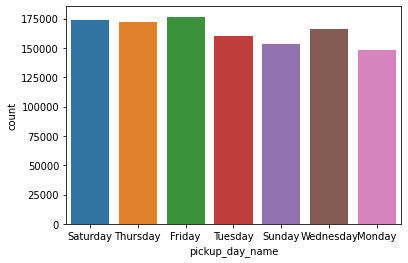

In [ ]:
import seaborn as sns

ax = sns.countplot(x="pickup_day_name",data=df_train)


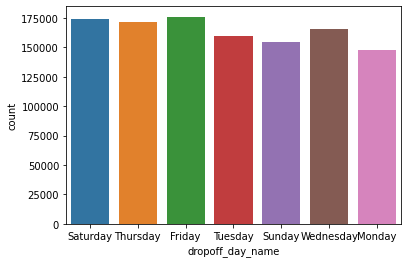

In [ ]:
ax1 = sns.countplot(x="dropoff_day_name",data=df_train)

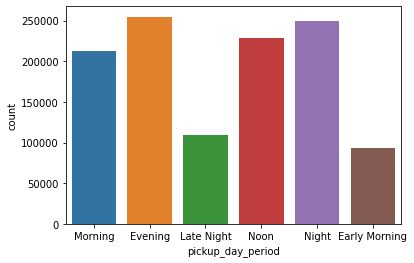

In [ ]:
ax2 = sns.countplot(x="pickup_day_period",data=df_train)

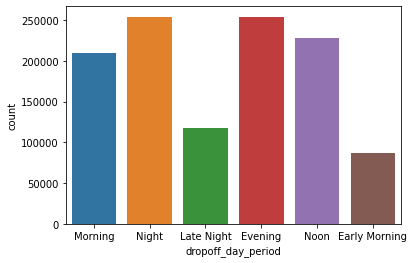

In [ ]:
ax3 = sns.countplot(x="dropoff_day_period",data=df_train)

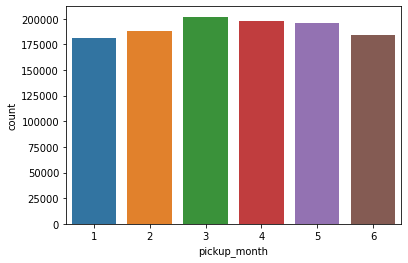

In [ ]:
ax4 = sns.countplot(x="pickup_month",data=df_train)

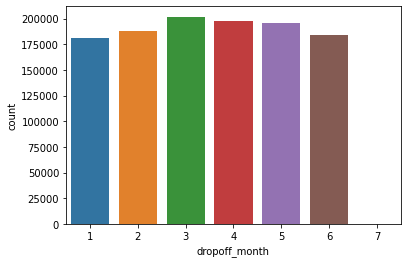

In [ ]:
ax5 = sns.countplot(x="dropoff_month",data=df_train)

**1.4**

Histogram for column trip duration


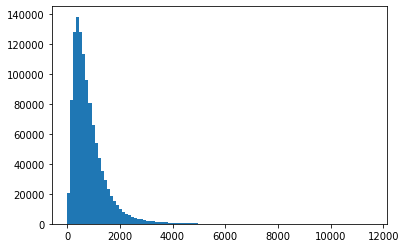

No handles with labels found to put in legend.


Histogram for column log_trip_duration


(array([2.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.2700e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.2300e+02, 0.0000e+00, 0.0000e+00, 2.3000e+02,
        0.0000e+00, 0.0000e+00, 2.1400e+02, 0.0000e+00, 1.4300e+02,
        1.6300e+02, 0.0000e+00, 1.5200e+02, 1.7900e+02, 1.3700e+02,
        1.2700e+02, 1.1100e+02, 1.2300e+02, 2.4100e+02, 9.1000e+01,
        2.0000e+02, 1.0300e+02, 1.8000e+02, 2.7500e+02, 1.8600e+02,
        2.5800e+02, 1.9800e+02, 2.4800e+02, 3.4700e+02, 3.5900e+02,
        3.7700e+02, 4.3100e+02, 4.9400e+02, 7.5700e+02, 8.3900e+02,
        9.9300e+02, 1.5160e+03, 1.8210e+03, 2.1660e+03, 3.1360e+03,
        4.1290e+03, 4.7480e+03, 6.5040e+03, 8.2540e+03, 1.0145e+04,
        1.2991e+04, 1.5104e+04, 1.9536e+04, 2.1710e+04, 2.5943e+04,
        3.0337e+04, 3.4740e+04, 3.8169e+04, 4.3128e+04, 4.6512e+04,
        5.0426e+04, 5.2926e+04, 5.6550e+04, 5.6829e+04, 5.9107e+04,
        5.8656e+04, 5.7412e+04, 5.6674e+04, 5.34

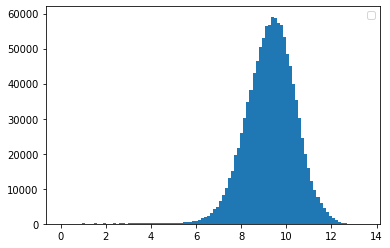

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

df_train.head(10)
data = df_train['trip_duration']

print("Histogram for column trip duration")
plt.hist(data, bins = 100,label='log_trip_duration')
plt.show()
plt.legend()
df_train['log_trip_duration'] = np.log2(df_train['trip_duration'])
newdata = df_train['log_trip_duration']
print("Histogram for column log_trip_duration")
plt.hist(newdata, bins = 100)
#df_train.head(10)


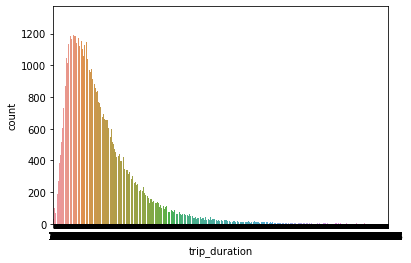

In [ ]:
ax6 = sns.countplot(x="trip_duration",data=df_train)

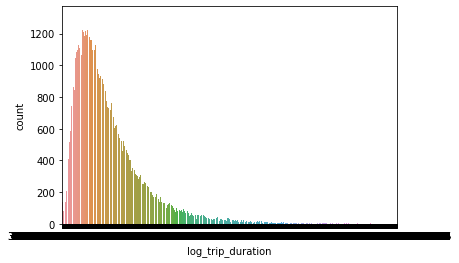

In [ ]:
ax7 = sns.countplot(x="log_trip_duration",data=df_train)

**1.5**

vendor_id
1    818.961244
2    829.535407
Name: trip_duration, dtype: float64


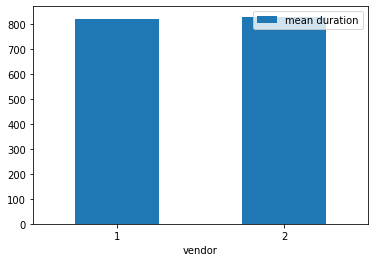

In [ ]:
mean_duration=df2.groupby('vendor_id')['trip_duration'].mean()
print(mean_duration)

dfgram = pd.DataFrame({'vendor':['1', '2'], 'mean duration':list(mean_duration)})
ax = dfgram.plot.bar(x='vendor', y='mean duration', rot=0)

**1.6**

In [ ]:
df3 = df_train.groupby('passenger_count', as_index=False)['trip_duration'].mean()
df3

,passenger_count,trip_duration
0,0,256.023256
1,1,813.125371
2,2,863.162575
3,3,854.087507
4,4,877.430226
5,5,832.208717
6,6,823.179864


**ΠΑΡΑΤΗΡΗΣΕΙΣ:** Παρατηρούμε οτι όταν δεν υπάρχουν επιβάτες είναι μικρής διάρκειας τα ταξίδια .

Από εκεί και πέρα δεν είναι μεγάλη η διαφορά της ύπαρξης λίγων ή πολλων επιβατών

**1.7**

In [ ]:
import numpy as np

#######  train #####
diff = abs(df_train[['pickup_longitude','pickup_latitude']].to_numpy()-df_train[['dropoff_longitude','dropoff_latitude']].to_numpy()) # absolute differences
df_train['manhattan_distance'] = np.sum(diff,axis=1)    

#test
diff = abs(df_test[['pickup_longitude','pickup_latitude']].to_numpy()-df_test[['dropoff_longitude','dropoff_latitude']].to_numpy()) # absolute differences
df_test['manhattan_distance'] = np.sum(diff,axis=1) 

pickup_day_name
Friday       0.043481
Monday       0.045953
Saturday     0.042381
Sunday       0.047403
Thursday     0.043670
Tuesday      0.042844
Wednesday    0.042846
Name: manhattan_distance, dtype: float64


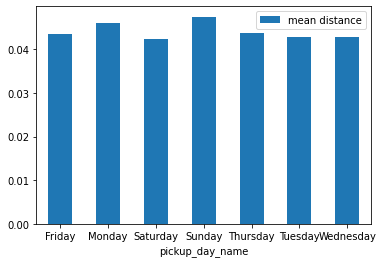

In [ ]:
groupby_pc=df_train.groupby("pickup_day_name") # bale 'day' 
mean_distance=groupby_pc['manhattan_distance'].mean()
print(mean_distance)

dfgram17 = pd.DataFrame({'pickup_day_name':list(groupby_pc.groups.keys()), 'mean distance':list(mean_distance)})
ax17 = dfgram17.plot.bar(x='pickup_day_name', y='mean distance', rot=0)

Text(0, 0.5, 'duration')

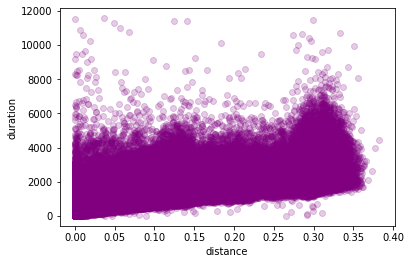

In [ ]:
import matplotlib.pyplot as plt


distance_x=df_train['manhattan_distance']
duration_y=df_train['trip_duration']

fig, ax = plt.subplots()
#plt.scatter(distance_x ='distance', duration_y='duration' , c ="purple")
ax.scatter(distance_x , duration_y, c ="purple", alpha=0.2)
ax.set_xlabel('distance')
ax.set_ylabel('duration')

**1.8**

Mean velocity is:
0.5723040376475034


,pickup_hour,velocity
0,00:00:00,0.317307
1,00:00:01,0.320922
2,00:00:02,0.449860
3,00:00:03,0.556855
4,00:00:04,0.475163
...,...,...
86001,23:59:55,0.337872
86002,23:59:56,0.566745
86003,23:59:57,0.442074
86004,23:59:58,0.462924


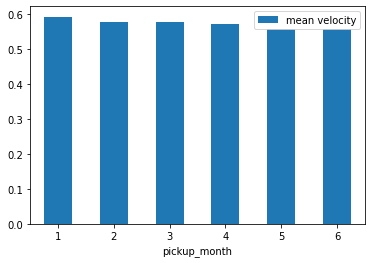

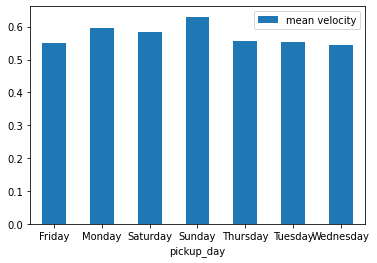

In [ ]:
import seaborn as sns

diff = (df_train[['pickup_longitude','dropoff_longitude']].to_numpy()-df_train[['pickup_latitude','dropoff_latitude']].to_numpy())
df_train['dist'] = np.abs((diff).sum(+1))


df_train["velocity"] = df_train["dist"]/df_train["trip_duration"]
mean_velocity = df_train["velocity"].mean()

print("Mean velocity is:")
print(mean_velocity)

df4 = df_train.groupby('pickup_month', as_index=False)['velocity'].mean()
df5 = df_train.groupby('pickup_hour', as_index=False)['velocity'].mean()
df6 = df_train.groupby('pickup_day_name', as_index=False)['velocity'].mean()


dfgram4 = pd.DataFrame({'pickup_month':df4['pickup_month'], 'mean velocity':df4["velocity"]})
ax4 = dfgram4.plot.bar(x='pickup_month', y='mean velocity', rot=0)

#dfgram5 = pd.DataFrame({'pickup_hour':df5['pickup_hour'], 'mean velocity':df5["velocity"]})
#ax5 = dfgram5.plot.bar(x='pickup_hour', y='mean velocity', rot=0)

dfgram6 = pd.DataFrame({'pickup_day':df6['pickup_day_name'], 'mean velocity':df6["velocity"]})
ax6 = dfgram6.plot.bar(x='pickup_day', y='mean velocity', rot=0)


df4
df5

**1.9**




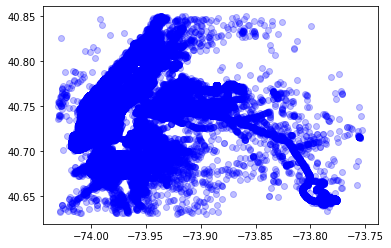

In [ ]:
#PICKUP
pickup_x=df_train['pickup_longitude']
pickup_y=df_train['pickup_latitude']

plt.scatter(pickup_x, pickup_y, c ="blue", alpha=0.25)


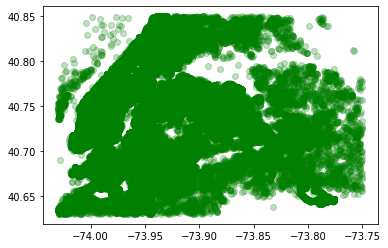

In [ ]:
#DROPOFF

dropoff_x=df_train['dropoff_longitude']
dropoff_y=df_train['dropoff_latitude']

plt.scatter(dropoff_x, dropoff_y, c ="green", alpha=0.25)

**2.1**

In [ ]:


dftime=df_train.head(1000)  

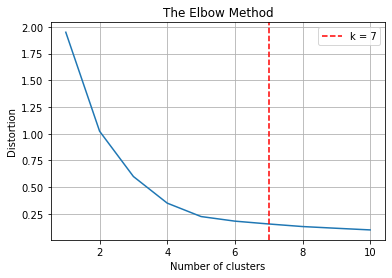

In [ ]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
#import minisom


X = dftime[["pickup_latitude","pickup_longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = dftime[["pickup_latitude","pickup_longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
dftime[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
#dftime.sample(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


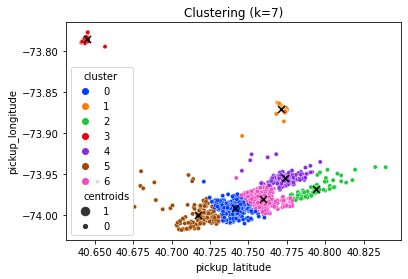

In [ ]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="pickup_latitude", y="pickup_longitude", data=dftime, palette=sns.color_palette("bright",k), hue='cluster', size="centroids", size_order=[1,0], legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

**2.2**

In [ ]:
dftime
X = dftime[['pickup_latitude', 'pickup_longitude']]
Y = dftime['log_trip_duration']

x=dftime['pickup_latitude']
y=dftime['pickup_longitude']
z=dftime['log_trip_duration']




In [ ]:
from sklearn.ensemble import RandomForestRegressor

dftime1 = dftime.head(1000)
X = dftime1[['pickup_latitude', 'pickup_longitude']] #Two-dimensional (pd DataFrame)
Y = dftime1['log_trip_duration'] #One-dimensional (pd Series)

#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=2,
                           min_samples_split=2, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=2, random_state=1)

In [ ]:
#rf.estimators_[index]
#rf.estimators_[0] #First tree

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rf.estimators_[0], feature_names=['Latitude', 'Longitude'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("tree") 



'tree.png'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,
                                                    random_state=2,
                                                    shuffle=True)

from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()

rs = RandomizedSearchCV(model, n_iter=10,
                        param_distributions = {'max_depth': range(1, 15),
                                               'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

print(rs.best_params_)
print(-rs.best_score_)

{'min_samples_split': 2, 'max_depth': 4}
1.1881170070010665


In [ ]:
#Import the class
from sklearn.ensemble import RandomForestRegressor

X = dftime1[['pickup_latitude', 'pickup_longitude']] #Two-dimensional (pd DataFrame)
Y = dftime1['log_trip_duration'] #One-dimensional (pd Series)

#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=12,
                           min_samples_split=13, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=12, min_samples_split=13, random_state=1)

In [ ]:

#Import the class
from sklearn.ensemble import RandomForestRegressor

X = dftime1[['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] #Two-dimensional (pd DataFrame)


Y = dftime1['log_trip_duration'] #One-dimensional (pd Series)

#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=12,
                           min_samples_split=13, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=12, min_samples_split=13, random_state=1)

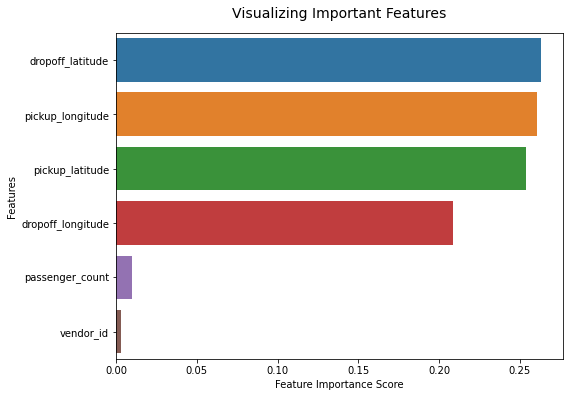

In [ ]:
fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(rf.feature_importances_, 
                        index=['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

**2.3**

2.3 - Πρώτη δοκιμή

-δοκιμάζουμε **ΛΙΓΕΣ ΕΠΙΛΟΓΕΣ ΣΤΙΣ ΠΑΡΑΜΕΤΡΟΥΣ** σε dataframe με **1000γραμμες**

In [ ]:
X1= dftime1[['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] #Two-dimensional (pd DataFrame)
Y1 = dftime1['log_trip_duration'] #One-dimensional (pd Series)

from sklearn.model_selection import GridSearchCV

In [ ]:

#from sklearn.model_selection import GridSearchCV

parameters1 = {'n_estimators':range(50,150,20), 'max_depth': range(5, 10),'min_samples_split': range(10, 15)}

GS1 = GridSearchCV(RandomForestRegressor(), parameters1)
GS1.fit(X1, Y1)
print(GS1.best_params_)

{'max_depth': 9, 'min_samples_split': 13, 'n_estimators': 50}


2.3 - ΔΕΥΤΕΡΗ ΔΟΚΙΜΗ 

-**ΠΕΡΙΣΣΟΤΕΡΕΣ ΕΠΙΛΟΓΕΣ ΣΤΙΣ ΠΑΡΑΜΕΤΡΟΥΣ** σε dataframe με **100 γραμμες**

In [ ]:
dftime2=df_train.head(100)

X2 = dftime2[['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] #Two-dimensional (pd DataFrame)
Y2 = dftime2['log_trip_duration'] #One-dimensional (pd Series)


In [ ]:
parameters2 = {'n_estimators':range(5,150,5), 'max_depth': range(1, 15),'min_samples_split': range(2, 50)} 

GS2 = GridSearchCV(RandomForestRegressor(), parameters2)
GS2.fit(X2, Y2)
print(GS2.best_params_)

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}


2.3 - ΤΕΛΙΚΗ ΔΟΚΙΜΗ 

-**ΠΟΛΛΕΣ ΕΠΙΛΟΓΕΣ ΣΤΙΣ ΠΑΡΑΜΕΤΡΟΥΣ** και **ΠΟΛΛΕΣ ΓΡΑΜΜΕΣ** (1000)

In [ ]:
X= dftime1[['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] #Two-dimensional (pd DataFrame)
Y = dftime1['log_trip_duration'] #One-dimensional (pd Series)

In [ ]:
# ΑΠΛΑ ΑΛΛΑΖΟΥΜΕ ΤΟ X KAI Y ΓΙΑ ΝΑ ΠΕΡΙΕΧΟΥΝ ΠΕΡΙΣΣΟΤΕΡΕΣ ΓΡΑΜΜΕΣ
parameters = {'n_estimators':range(5,150,5), 'max_depth': range(1, 15),'min_samples_split': range(2, 20)} 

GS = GridSearchCV(RandomForestRegressor(), parameters)
GS.fit(X, Y)  
print(GS.best_params_)

{'max_depth': 14, 'min_samples_split': 2, 'n_estimators': 55}


**2.4**

In [ ]:
best_params_={'max_depth':14,'min_samples_split':2,'n_estimators':55}  # επιλεγουμε το αποτέλεσμα της τελικής(και καλύτερης) δοκιμής
#!!!!!!!!!!!!!    to 2.4 den to treksame mazi me to 2.3  , allios tha kaname apla ayto:
#  best_params  = GS.best_params_

In [ ]:
rf1 = RandomForestRegressor(n_estimators=best_params_['n_estimators'], max_depth=best_params_['max_depth'],
                           min_samples_split=best_params_['min_samples_split'])

#Fit (train) the model
rf1.fit(X, Y)

test_sample=df_test.head(100)[['vendor_id', 'passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
pred=rf1.predict(test_sample) 

**2.5**

In [ ]:
#log metasxhmatismos
df_target['log_trip_duration'] = np.log2(df_target['trip_duration'])
target_sample=df_target.head(100)['log_trip_duration']

# errors
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(target_sample,pred)  
mse = mean_squared_error(target_sample,pred)

print('mae: ',mae)
print('mse: ',mse)

mae:  0.6079097266280931
mse:  0.7042423014048592


**ΠΑΡΑΤΗΡΗΣΕΙΣ 2.3-2.5**




Για να προχωρήσουμε στις παρατηρήσεις ,πρώτα, θα πειραματιστούμε περισσότερο με τις παραμετρους

Η παρακάτω συνάρτηση επιστρεφει για δεδομένες τιμές των παραμέτρων τα  MAE και MSE

In [ ]:
def errors(maxd,mss,ne ,X , Y , test ,target):
  errors=[]

  if(maxd=='None'):
    rf= RandomForestRegressor(n_estimators=ne,min_samples_split=mss)
  else :
    rf= RandomForestRegressor(n_estimators=ne, max_depth=maxd,min_samples_split=mss)  
  rf.fit(X, Y)
  pred=rf.predict(test)
  errors.append(  mean_absolute_error(target,pred)  ) 
  errors.append(  mean_squared_error(target,pred)  )
  return errors



In [ ]:

print("\n let's compare the effeciency of the 3 parameter patterns from our GridSearchCV implementation \n \n")
print("maxd,min_samples, n estimators ,    MAE      ,      MSE  \n")

print("(first try:)")
print(" 9 ,     13     ,      50     ",errors(9,13,50,X,Y,test_sample,target_sample))
print("(second try:)")
print(" 5 ,     2     ,      10     ",errors(5,2,10,X,Y,test_sample,target_sample))
print("(final try -THE PARAMETERS WE CHOSE:)")
print(" 14 ,     2     ,      55     ",errors(14,2,55,X,Y,test_sample,target_sample))


 let's compare the effeciency of the 3 parameter patterns from our GridSearchCV implementation 
 

maxd,min_samples, n estimators ,    MAE      ,      MSE  

(first try:)
 9 ,     13     ,      50      [0.6447586206702798, 0.7327319099322491]
(second try:)
 5 ,     2     ,      10      [0.7363537761131334, 0.96476859594087]
(final try -THE PARAMETERS WE CHOSE:)
 14 ,     2     ,      55      [0.6160654672113053, 0.680786896893517]


Πήραμε το αναμενόμενο αποτέλεσμα αφου στη τελευταία δοκιμή ήταν περισσότερα τα δεδομένα ( οι δοκιμές έχουν γίνει στη 2.3)

Ας πειραματιστούμε χωρίς τον περιορισμό του τρεξίματος ενός GRID SEARCH CV

In [ ]:
print("maxd,min_samples, n estimators ,    MAE      ,      MSE  \n")

print("(default:)")
print(" None ,     2     ,      100     ",errors('None',2,100,X,Y,test_sample,target_sample))
print("(let's change only n-estimators:)")
print(" None ,     2     ,      10     ",errors('None',2,10,X,Y,test_sample,target_sample))
print(" None ,     2     ,      50     ",errors('None',2,50,X,Y,test_sample,target_sample))
print(" None ,     2     ,      55     ",errors('None',2,55,X,Y,test_sample,target_sample))
print(" None ,     2     ,      75     ",errors('None',2,75,X,Y,test_sample,target_sample))
print(" None ,     2     ,      500     ",errors('None',2,500,X,Y,test_sample,target_sample))
print(" None ,     2     ,      1000     ",errors('None',2,1000,X,Y,test_sample,target_sample))


maxd,min_samples, n estimators ,    MAE      ,      MSE  

(default:)
 None ,     2     ,      100      [0.5644364652230905, 0.6252247995937927]
(let's change only n-estimators:)
 None ,     2     ,      10      [0.6244159260546165, 0.7773346413579502]
 None ,     2     ,      50      [0.55852512279148, 0.622251344278816]
 None ,     2     ,      55      [0.5738779851002042, 0.6296918266111708]
 None ,     2     ,      75      [0.5926156345692948, 0.6671785914412712]
 None ,     2     ,      500      [0.5721498792807529, 0.6423256729376148]
 None ,     2     ,      1000      [0.5770697490727741, 0.6483312763498739]


**ΤΕΛΙΚΕΣ ΠΑΡΑΤΗΡΗΣΕΙΣ:** 


Καταρχάς βλέπουμε οτι είναι αποδοτική η τιμή None στο max_depth(δυστυχώς δεν την είχαμε βαλει σαν επιλογή στη 2.3)


**max_depth:**  None σε αυτη τη παραμετρο (σε συνδυασμο αν δεν κανουμε λαθος με min_samples_split=2) σημαινει ότι τα decision trees επαικτείνονται μέχρι να έχουμε pure leaves

Σαφώς λοιπόν και είναι ετσι πολύ καλη η απόδοση 



**N-estimators:** Θα περιμέναμε ότι όσο περισσότερα είναι τα δέντρα τοσο αποδοτικό θα ήταν και το μοντέλο . Στις δοκιμές μας ωστόσο για κάποιο λόγο τιμές κοντά στο 50 ήταν συνήθως οι καλύτερες για αυτή τη παράμετρο